In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import gurobipy as gp
import matplotlib.pyplot as plt

## Reading ROI Datafile - Please read new file in the below cell

In [2]:
estimated_roi = pd.read_csv("ROI_data.csv") # read the ROI file

estimated_roi # view the data for reference

,Platform,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
1,Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


**Reading monthly ROI datafile**

In [3]:
roi_monthly = pd.read_csv("roi_mat.csv") # read the ROI file

roi_monthly  # view the data for reference

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
5,June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
6,July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
7,August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
8,September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4
9,October,3.0,3.0,3.1,4.6,3.1,3.3,3.2,2.30,2.5,3.2


## Linear Problem Formulation

We have 10 variables corresponding to the budget spent (in millions) in each of the 10 marketing mediums:

$x_1$ =  amount spent in Print, $x_2$ =  amount spent in TV, $x_3$ =  amount spent in SEO,  $x_4$ =  amount spent in AdWords,
$x_5$ =  amount spent in Facebook, $x_6$ =  amount spent in LinkedIn, $x_7$ =  amount spent in Instagram,
$x_8$ =  amount spent in Snapchat, $x_9$ =  amount spent in Twitter, $x_{10}$ =  amount spent in Email

**Constraints**

$x_1 + x_2 + x_3 + x_4 + x_5 + x_6 + x_7 + x_8 + x_9 +x_{10} <=10$

$x_1 + x_2 - x_5 - x_{10} <= 0$ 

$x_5 + x_6 + x_7 + x_8 + x_9 - 2x_3 - 2x_4 >=0$

$x_1 <= 3$

$x_2 <= 3$

$x_3 <= 3$

$x_4 <= 3$

$x_5 <= 3$

$x_6 <= 3$

$x_7 <= 3$

$x_8 <= 3$

$x_9 <= 3$

$x_{10} <= 3$

Maximize return on investment based on different ROI estimates

In [4]:
A = np.zeros((13,10)) # initialize constraint matrix

A[0,:] = [1,1,1,1,1,1,1,1,1,1] 
A[1,:] = [1,1,0,0,-1,0,0,0,0,-1] 
A[2,:] = [0,0,2,2,-1,-1,-1,-1,-1,0] 
A[3:13,:] = np.diag(np.ones(10))

b = np.array([10,0,0,3,3,3,3,3,3,3,3,3,3]) 
sense = np.array(['<']*13)

## Optimal budget allocation

### Part 3) -  Using ROIs of first consulting firm

In [5]:
marketing_return1 = estimated_roi.iloc[0][estimated_roi.columns[1:]].to_numpy() # objective vector
marketing_model1= gp.Model() # initialize an empty model

marketing_x1 = marketing_model1.addMVar(10) # tell the model how many variables there are

marketing_con1 = marketing_model1.addMConstrs(A, marketing_x1, sense, b) # add the constraints to the model
marketing_model1.setMObjective(None,marketing_return1,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

marketing_model1.Params.OutputFlag = 0 

marketing_model1.optimize() # solve the LP

Academic license - for non-commercial use only - expires 2022-09-15
Using license file C:\Users\palak\gurobi.lic


In [6]:
optimal_obj_1 = marketing_model1.objVal #extract optimal objective value
print("Optimal objective value:",optimal_obj_1)

Optimal objective value: 0.45600000000000007


In [7]:
allocation_1 = marketing_x1.x #extract optimal allocation
print("The optimal budget allocation according to the first consulting firm:", allocation_1)

The optimal budget allocation according to the first consulting firm: [0. 3. 0. 1. 0. 0. 3. 0. 0. 3.]


### Part 4) -  Using ROIs of second consulting firm

In [8]:
marketing_return2 = estimated_roi.iloc[1][estimated_roi.columns[1:]].to_numpy() # objective vector

marketing_model2= gp.Model() # initialize an empty model

marketing_x2 = marketing_model2.addMVar(10) # tell the model how many variables there are

marketing_con2 = marketing_model2.addMConstrs(A, marketing_x2, sense, b) # add the constraints to the model
marketing_model2.setMObjective(None,marketing_return2,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

marketing_model2.Params.OutputFlag = 0 

marketing_model2.optimize() # solve the LP

In [9]:
optimal_obj_2 = marketing_model2.objVal # extract optimal objective value
print("Optimal objective value:",optimal_obj_2)

Optimal objective value: 0.45600000000000007


In [10]:
allocation_2 = marketing_x2.x # extract optimal allocation
print("The optimal budget allocation according to the second consulting firm:", allocation_2)

The optimal budget allocation according to the second consulting firm: [3. 0. 0. 1. 3. 3. 0. 0. 0. 0.]


## Comparing the two allocations

### Part 5)

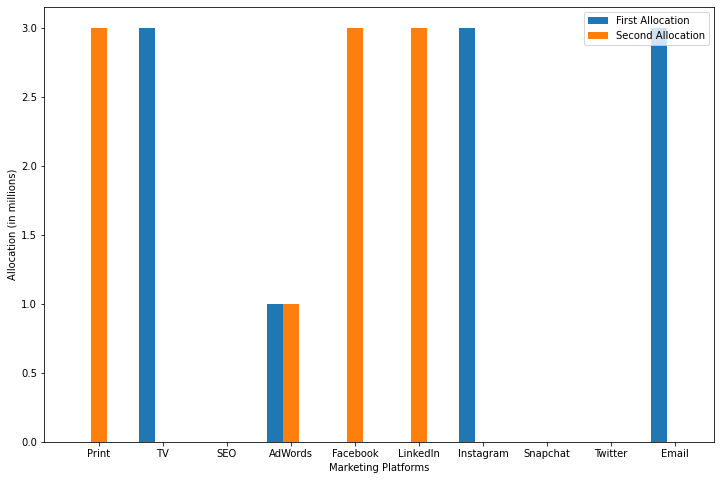

In [11]:
barWidth = 0.25
plt.subplots(figsize =(12, 8))

br1 = np.arange(len(estimated_roi.columns[1:]))
br2 = [x + barWidth for x in br1]

plt.bar(br1,allocation_1, width = barWidth,label = "First Allocation")
plt.bar(br2,allocation_2, width = barWidth, label = "Second Allocation")
plt.xlabel("Marketing Platforms")
plt.ylabel("Allocation (in millions)")
plt.xticks([r + barWidth for r in range(len(allocation_1))],estimated_roi.columns[1:])

plt.legend(loc="upper right")
plt.show()

Although the optimal objective value remains same in utilization of ROI estimates from both firms (0.456M dollars), the allocations to marketing mediums are different. Comparing both, we observe:
- The first ROI data suggests that we invest 3M dollars each in TV, Instagram and Email. However, the ROI data from the second firm suggests that we do not invest in any of these mediums and instead invest 3M dollars each in Print, Facebook and LinkedIn.
- Both suggest that we invest 1M dollars in AdWords
- Both suggest that we do not invest in SEO, Snapchat and Twitter


**Using second allocation when first ROI data is correct**

In [12]:
print("The optimal objective decreases by",optimal_obj_1 - marketing_return1@allocation_2)

The optimal objective decreases by 0.20400000000000007


**Using first allocation when second ROI data is correct**

In [13]:
print("The optimal objective decreases by",optimal_obj_2 - marketing_return2@allocation_1)

The optimal objective decreases by 0.19200000000000006


**Is the third constraint useful**

In [14]:
[con.Pi for con in marketing_con1]

[0.039,
 0.010000000000000002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006999999999999999,
 0.0,
 0.0,
 0.015]

In [15]:
[con.Pi for con in marketing_con2]

[0.039,
 0.010000000000000002,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.015,
 0.006999999999999999,
 0.0,
 0.0,
 0.0,
 0.0]

First ROI estimates: If we relax the constraints on the amount invested in Instagram or email (<= 3M dollars constraint currently), our objective value will improve.

Second ROI estimates: If we relax the constraints on the amount invested in Facebook or LinkedIn (<= 3M dollars constraint currently), our objective value will improve.

In other words, the shadow price for these constraints is non-zero which implies these are binding constraints. Hence, the third constraint is contributing to bindings constraints which are driving the estimation of optimal value and if the constraint changes, the optimal value changes as well.

Also, its worth noting that although the relaxation of the third constraint can increase the objective value, its better to invest across different platforms in order to reduce risks.

## Range of ROI data and difference from first ROIs

### Part 6)

**Range of ROI estimates**

In [16]:
range_roi = pd.DataFrame(index = estimated_roi.columns[1:],columns = ["Min","Max"])

range_roi["Min"] = marketing_x1.SAObjLow
range_roi["Max"] = marketing_x1.SAObjUp
range_roi 

,Min,Max
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
AdWords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039
Email,0.029,inf


**By how much can we increase or decrease ROI estimate (using first ROI estimates as starting point)**

In [17]:
df = pd.DataFrame(estimated_roi.iloc[0][estimated_roi.columns[1:]] - range_roi["Min"], columns=["Can decrease by"])
df["Can increase by"] = range_roi["Max"] - estimated_roi.iloc[0][estimated_roi.columns[1:]]
df

,Can decrease by,Can increase by
Print,inf,0.018
TV,0.01,0.013
SEO,inf,0.015
AdWords,0.006,0.007
Facebook,inf,0.013
LinkedIn,inf,0.015
Instagram,0.007,inf
Snapchat,inf,0.013
Twitter,inf,0.006
Email,0.015,inf


## Optimal allocations for each month
### Part 7)

In [18]:
Budget = 10 #initialize budget
monthly_returns = []

monthly_alloc = pd.DataFrame(columns = roi_monthly.columns[1:]) #empty dataframe that holds optimal allocation for each month 

for i in range(0,12):
    
    b3 = np.array([Budget,0,0,3,3,3,3,3,3,3,3,3,3]) 
    marketing_return3 = estimated_roi.iloc[0][estimated_roi.columns[1:]].to_numpy() # objective vector
    marketing_model3= gp.Model() # initialize an empty model

    marketing_x3 = marketing_model3.addMVar(10) # tell the model how many variables there are

    marketing_con3 = marketing_model3.addMConstrs(A, marketing_x3, sense, b3) # add the constraints to the model
    marketing_model3.setMObjective(None,marketing_return3,0,sense=gp.GRB.MAXIMIZE) # add the objective to the model

    marketing_model3.Params.OutputFlag = 0 

    marketing_model3.optimize() # solve the LP
    
    returns = marketing_x3.x@(roi_monthly.iloc[i][roi_monthly.columns[1:]].to_numpy())/100
    monthly_alloc.loc[roi_monthly.iloc[i][0]] =  marketing_x3.x
    monthly_returns.append(returns)
    Budget = Budget+ returns*0.5
    
monthly_alloc["Actual returns"] = monthly_returns
monthly_alloc

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Actual returns
January,0.0,3.0,0.0,1.000000,0.0,0.0,3.0,0.0,0.000000,3.0,0.360000
February,0.0,3.0,0.0,1.180000,0.0,0.0,3.0,0.0,0.000000,3.0,0.347840
March,0.0,3.0,0.0,1.353920,0.0,0.0,3.0,0.0,0.000000,3.0,0.324449
April,0.0,3.0,0.0,1.505381,0.0,0.0,3.0,0.0,0.010763,3.0,0.357624
May,0.0,3.0,0.0,1.564986,0.0,0.0,3.0,0.0,0.129971,3.0,0.389058
June,0.0,3.0,0.0,1.629829,0.0,0.0,3.0,0.0,0.259657,3.0,0.419281
July,0.0,3.0,0.0,1.699709,0.0,0.0,3.0,0.0,0.399418,3.0,0.441764
August,0.0,3.0,0.0,1.773336,0.0,0.0,3.0,0.0,0.546672,3.0,0.434534
September,0.0,3.0,0.0,1.845758,0.0,0.0,3.0,0.0,0.691517,3.0,0.375183
October,0.0,3.0,0.0,1.908289,0.0,0.0,3.0,0.0,0.816578,3.0,0.390196


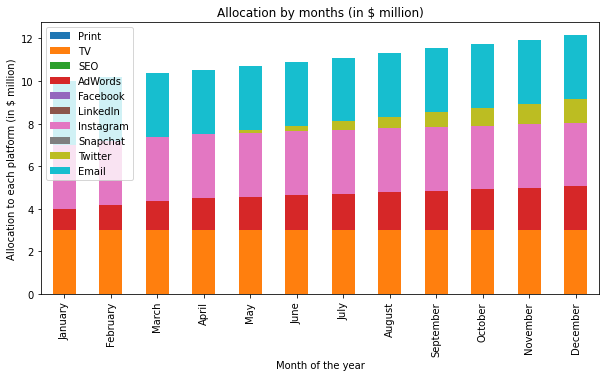

In [19]:
monthly_alloc[:][monthly_alloc.columns[:-1]].plot(kind='bar', stacked=True,title='Allocation by months (in $ million)',figsize=(10, 5))
plt.xlabel('Month of the year')
plt.ylabel('Allocation to each platform (in $ million)')
plt.show()

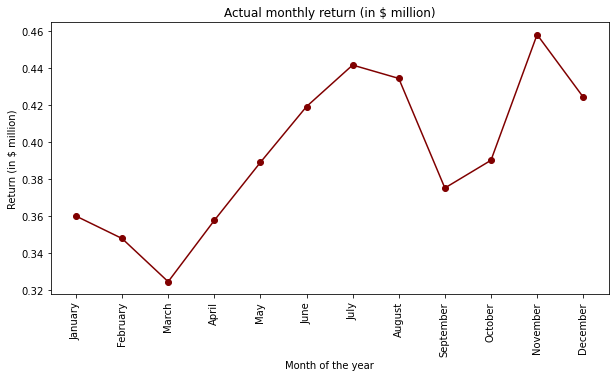

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_alloc["Actual returns"], marker="o", color="maroon")
plt.xticks(rotation = 90)
plt.title("Actual monthly return (in $ million)")
plt.xlabel('Month of the year')
plt.ylabel('Return (in $ million)')
plt.show()

## Stable budget
### Part 8)

To determine if the budget is stable or not, we compared the investments for each platform for 2 successive months starting from January (month 0) to November (month 11) (i.e., at the end, we compare November with December) and assigned a value of 1 to the stable matrix's [month][platform] if the absolute value of the difference in investments is less than or equal to 1 million. 

We then loop over the stable matrix to check if there are any zeros (i.e. the solution is unstable) or if it is stable

In [21]:
#creating a stable indicator matrix with all 1s; we will update the stable matrix with 0 when a platform is unstable at any month
#for stability check of each platform, we will compare the allocations for month 'i' and 'i+1' starting from month 0 (i.e January) to month 11 (i.e November)

stable = np.zeros((11,10))

for j in range(10):    #This is the range to loop over all the 10 platforms of investment; j has values 0,1,2,3,4,5,6,7,8,9
    for i in range(11):  #This is the range to loop over all the 11 months of the year (Jan-Nov) and compare the investments for 2 successive months; i has values 0,1,2,3,4,5,6,7,8,9,10
        if abs(monthly_alloc.iloc[i][j] - monthly_alloc.iloc[i+1][j]) <= 1:
            stable[i][j] = 1 
            
for i in range(11):
    if np.product(stable[i]) == 0:
        print("Solution is unstable")
        break
        
    elif i==10:
        print("Solution is stable")

Solution is stable
